In [23]:
from tqdm import tqdm

# Импортируем основные модули pytorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Импортируем модули, связанные с компьютерным зрением
from torchvision import datasets
from torchvision.transforms import ToTensor

# Импортируем вспомогательные модули
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [30]:
class FCNet(nn.Module):

    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(3*32*32, 500)
        self.fc2 = nn.Linear(500, 200)
        self.fc3 = nn.Linear(200, 80)
        self.fc4 = nn.Linear(80, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout()
        self.bn = nn.BatchNorm1d(500)
        # self.bn = nn.BatchNorm1d()

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.bn(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)

        return x

In [31]:
# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 20
BATCH_SIZE = 256

# Загружаем данные из набора CIFAR10
train_data = datasets.CIFAR10(root='./data/cifar/train', train=True, download=True, transform=ToTensor())
test_data = datasets.CIFAR10(root='./data/cifar/test', train=False, download=True, transform=ToTensor())

# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

# Если графический ускоритель поддерживает обучение на нем, будем использовать его,
# иначе обучать на процессоре.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Готовимся к обучению
model = FCNet().to(device)  # создаем модель
optimizer = torch.optim.AdamW(model.parameters())  # оптимизатор, нужно выбрать и настроить
loss_function = nn.CrossEntropyLoss()  # функция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости

Files already downloaded and verified
Files already downloaded and verified


In [32]:
# Начинаем обучение
for epoch in range(EPOCHS):
    for i, (batch, labels) in tqdm(enumerate(train_loader)):  # разбиваем выборку на пакеты
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(batch)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        
        loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
    print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')

196it [00:03, 51.60it/s]


Эпоха 1 завершилась с функцией стоимости на последнем пакете = 1.630245566368103


196it [00:03, 52.03it/s]


Эпоха 2 завершилась с функцией стоимости на последнем пакете = 1.6100714206695557


196it [00:03, 49.52it/s]


Эпоха 3 завершилась с функцией стоимости на последнем пакете = 1.5179675817489624


196it [00:03, 52.18it/s]


Эпоха 4 завершилась с функцией стоимости на последнем пакете = 1.7035176753997803


196it [00:03, 51.52it/s]


Эпоха 5 завершилась с функцией стоимости на последнем пакете = 1.343756914138794


196it [00:03, 51.36it/s]


Эпоха 6 завершилась с функцией стоимости на последнем пакете = 1.439924955368042


196it [00:03, 52.03it/s]


Эпоха 7 завершилась с функцией стоимости на последнем пакете = 1.399043083190918


196it [00:03, 51.87it/s]


Эпоха 8 завершилась с функцией стоимости на последнем пакете = 1.3582701683044434


196it [00:03, 51.90it/s]


Эпоха 9 завершилась с функцией стоимости на последнем пакете = 1.314195156097412


196it [00:03, 50.26it/s]


Эпоха 10 завершилась с функцией стоимости на последнем пакете = 1.3083912134170532


196it [00:03, 50.14it/s]


Эпоха 11 завершилась с функцией стоимости на последнем пакете = 1.4045226573944092


196it [00:03, 50.49it/s]


Эпоха 12 завершилась с функцией стоимости на последнем пакете = 1.5022761821746826


196it [00:04, 48.84it/s]


Эпоха 13 завершилась с функцией стоимости на последнем пакете = 1.2103216648101807


196it [00:03, 51.91it/s]


Эпоха 14 завершилась с функцией стоимости на последнем пакете = 1.2610697746276855


196it [00:03, 51.68it/s]


Эпоха 15 завершилась с функцией стоимости на последнем пакете = 1.4228031635284424


196it [00:03, 51.43it/s]


Эпоха 16 завершилась с функцией стоимости на последнем пакете = 1.1537609100341797


196it [00:03, 51.87it/s]


Эпоха 17 завершилась с функцией стоимости на последнем пакете = 1.5625357627868652


196it [00:03, 51.52it/s]


Эпоха 18 завершилась с функцией стоимости на последнем пакете = 1.152531385421753


196it [00:03, 51.67it/s]


Эпоха 19 завершилась с функцией стоимости на последнем пакете = 1.356167197227478


196it [00:03, 50.67it/s]

Эпоха 20 завершилась с функцией стоимости на последнем пакете = 1.3073152303695679


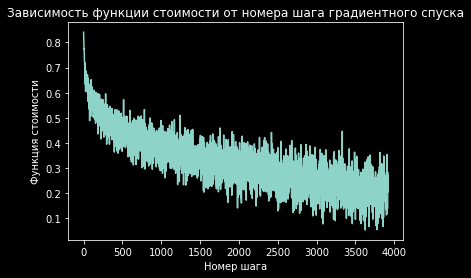

In [33]:
# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()

In [34]:
# Отключаем расчет вычислительного графа для экономии времени и памяти: нам не нужно считать градиенты при тестировании модели
with torch.no_grad():
    # Оцениваем качество модели
    train_data_loader = DataLoader(train_data, batch_size=len(train_data))
    train_features, train_targets = next(iter(train_data_loader))

    train_features = train_features.to(device)
    train_model_predictions = torch.argmax(model(train_features), dim=1)
    print('Точность (accuracy) на обучающей выборке:', accuracy_score(train_data.targets, train_model_predictions))

    test_data_loader = DataLoader(test_data, batch_size=len(test_data))
    test_features, test_targets = next(iter(test_data_loader))

    test_features = test_features.to(device)
    test_model_predictions = torch.argmax(model(test_features), dim=1)
    print('Точность (accuracy) на тестовой выборке:', accuracy_score(test_data.targets, test_model_predictions))

Точность (accuracy) на обучающей выборке: 0.57388
Точность (accuracy) на тестовой выборке: 0.5179
